# US Breweries Analysis

This project analyzes the geographical location and the different types of breweries in the United States.

## Table of Contents

- [Importing Dataset and Libraries](#importing)
- [Basic Data Exploration](#exploration)
- [Feature Engineering](#feature)
- [Data Visualization](#viz)
    - [Prevalence of BOP's (Brew On Premise)](#bop)
    - [Prevalence of Brewpubs](#brewpubs)
    - [Prevalence of Contract Breweries](#contract)
    - [Prevalence of Microbreweries](#micro)
    - [Prevalence of Multitap Bars](#multitap)
    - [Prevalence of Regional Breweries](#regional) 
- [Relationship between State and Brewery Type](#correlation)
- [Brewery Name Analysis](#name)

## Importing Dataset and Libraries <a name="exploration"></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy as st

In [38]:
data = pd.read_csv('../us-breweries/datasets_367098_716040_breweries_us.csv')

## Basic Data Exploration <a name="exploration"></a>

In [39]:
data.head()

,brewery_name,type,address,website,state,state_breweries
0,Valley Brewing Co.,Brewpub,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,california,284
1,Valley Brewing Co.,Brewpub,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,california,284
2,Valley Brewing Co,Microbrewery,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,california,284
3,Ukiah Brewing Company,Brewpub,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,california,284
4,Tustin Brewing Co.,Brewpub,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,california,284


In [40]:
data.shape

(2407, 6)

In [41]:
data.dtypes

brewery_name       object
type               object
address            object
website            object
state              object
state_breweries     int64
dtype: object

The original dataframe has dimension 2407x6 (i.e. 2407 rows and 6 columns). As for the columns, all of them are objects except for state_breweries, the number of breweries established in a given state, which is an integer.

In [42]:
data.columns

Index(['brewery_name', 'type', 'address', 'website', 'state',
       'state_breweries'],
      dtype='object')

In [43]:
data['type'].describe()

count        2407
unique         12
top       Brewpub
freq         1320
Name: type, dtype: object

In [44]:
labels = data['type'].astype('category').cat.categories.tolist()
labels

['BOP-BrewOnPremise',
 'BOP-BrewOnPremise-Closed',
 'Brewpub',
 'Brewpub-Closed',
 'Contract',
 'ContractBrewery',
 'ContractBrewery-Closed',
 'Microbrewery',
 'Microbrewery-Closed',
 'Mircobrewery',
 'MultitapBar',
 'RegionalBrewery']

## Feature Engineering <a name="feature"></a>

The above list shows the different types of breweries that exist in the US. We will correct the typo existing in 'Mircobrewery' and merge the categories 'Contract' and 'ContractBrewery'. Moreover, we will ignore the breweries that are closed at the moment. Hence, we need to subset our data to work with the breweries that are currently active.

In [45]:
data['type']= data['type'].str.replace('Mircobrewery', 'Microbrewery', case = False) 

In [46]:
data.loc[data['type'] == 'Contract']

,brewery_name,type,address,website,state,state_breweries
315,Back Forty Beer Co,Contract,"200 N. 6th St., Gadsden, Alabama, 35901",http://backfortybeer.com/,alabama,6
503,New Planet Beer Co,Contract,"P.O. Box 116 / 3980 Broadway Suites 103-116, B...",http://www.newplanetbeer.net/,colorado,182
863,Galena Beer Co,Contract,"404 S Dodge St, Galena, Illinois, ???",NaN,illinois,74
1330,Hometown Beverages,Contract,"23 Taylor Ave, Manasquan, New Jersey, 8857",...,new-jersey,41
1820,Pennsylvania Brewing Company,Contract,"800 Vinial St., Pittsburgh, Pennsylvania, 15212",http://www.pennbrew.com/,pennsylvania,107
1848,Iron City Brewing Co.,Contract,"3340 Liberty Ave., Pittsburgh, Pennsylvania, 1...",http://pittsburghbrewing.com/,pennsylvania,107
1849,Intercourse Brewing Co,Contract,"4166 Ironbridge Drive, Creamery, Pennsylvania,...",www.intercoursebrewingcompany.com,pennsylvania,107


The above table shows the rows in which we need to modify the content of the cell.

In [47]:
list_merge = [315, 503, 863, 1330, 1820, 1848, 1849]
for i in range(0,len(list_merge)):
    data.at[list_merge[i], 'type'] = 'ContractBrewery'

In [48]:
newdata = data[(data.type != 'BOP-BrewOnPremise-Closed') & (data.type != 'Brewpub-Closed') & (data.type != 'ContractBrewery-Closed') & (data.type != 'Microbrewery-Closed')]
newdata.shape

(2245, 6)

After subsetting the breweries that we will work with, the dataframe has downsized, as expected.

In [49]:
newlabels = newdata['type'].astype('category').cat.categories.tolist()
newlabels

['BOP-BrewOnPremise',
 'Brewpub',
 'ContractBrewery',
 'Microbrewery',
 'MultitapBar',
 'RegionalBrewery']

The brewery types considered for this analysis are the following:
  
- **BOP - Brew On Premise**: Homebrew laboratories where people can sign up to brew a batch of beer. It allows you to brew your own beer but without having to incur all the costs associated with purchasing the necessary equipment. Some BOP businesses are also used for leisure purposes where people can go there for a day to experiment a beer brewing workshop.


- **Brewpub**: Pub where the beer served is brewed on the premises.


- **Contract Brewery**: Arrangement between breweries where one brewery produces the beer for the another brewery. The responsibilities of each party may vary depending on the contract. 


- **Microbrewery**: Brewery that produces small amounts of beer (15,000 barrels or less of beer per year). Some of them generally ley emphasis on quality, flavor and technique and are also known as *craft breweries*.


- **Multitap Bar**: Bar that serves different craft beers from all over the world and of different brewers, type and quality level. 


- **Regional Brewery**: Brewery that supplies beer in a fixed geographical location. Their annual production tends to be between 15,000 and 6,000,000 barrels.

## Data Visualization <a name="viz"></a>

We first start this section by examining the frequency of each brewery type across the country.

In [50]:
types_df = newdata.drop(['brewery_name', 'address', 'website', 'state_breweries'], axis=1)
types_df1 = types_df.groupby('type').count()
types_df1.columns = ['Count of brewery type']
brewery_types = types_df1.sort_values('Count of brewery type', ascending=False)
brewery_types

,Count of brewery type
type,
Brewpub,1320
Microbrewery,724
ContractBrewery,149
RegionalBrewery,44
BOP-BrewOnPremise,6
MultitapBar,2


In [14]:
(size/np.sum(size))*100

array([ 0.26726058, 58.79732739,  6.63697105, 32.24944321,  0.08908686,
        1.95991091])

The majority of breweries are brewpubs (58.8%), followed by microbreweries (32.25%) and contract breweries (6.64%). The rest of brewery types (regional breweries, BOP's and multitap bars) amount to 2,31% of the breweries in the US.

In [53]:
newdata['state'].describe()

count           2245
unique            51
top       california
freq             280
Name: state, dtype: object

In [54]:
freq = newdata.groupby(newdata['state']).size()
freq.sort_values(ascending = False) 

state
california        280
colorado          166
oregon            146
washington        133
pennsylvania      100
new-york           98
michigan           88
florida            82
texas              77
wisconsin          73
illinois           68
massachusetts      64
ohio               56
north-carolina     56
georgia            45
maryland           41
maine              41
new-jersey         40
minnesota          38
virginia           38
new-mexico         36
arizona            33
south-carolina     31
montana            31
indiana            28
vermont            27
idaho              25
kansas             24
tennessee          24
missouri           21
utah               20
nevada             18
new-hampshire      17
nebraska           15
oklahoma           15
louisiana          14
alaska             14
delaware           14
iowa               13
rhode-island       12
connecticut        11
kentucky           10
hawaii             10
south-dakota        9
washington-dc       9
wyom

This table shows the different US states and ther amount of breweries sorted in descending order. California, followed by Colorado, is the state with the largest amount of breweries whereas Puerto Rico is the state with the fewest breweries. The ranking in the above table can also be represented more visually:

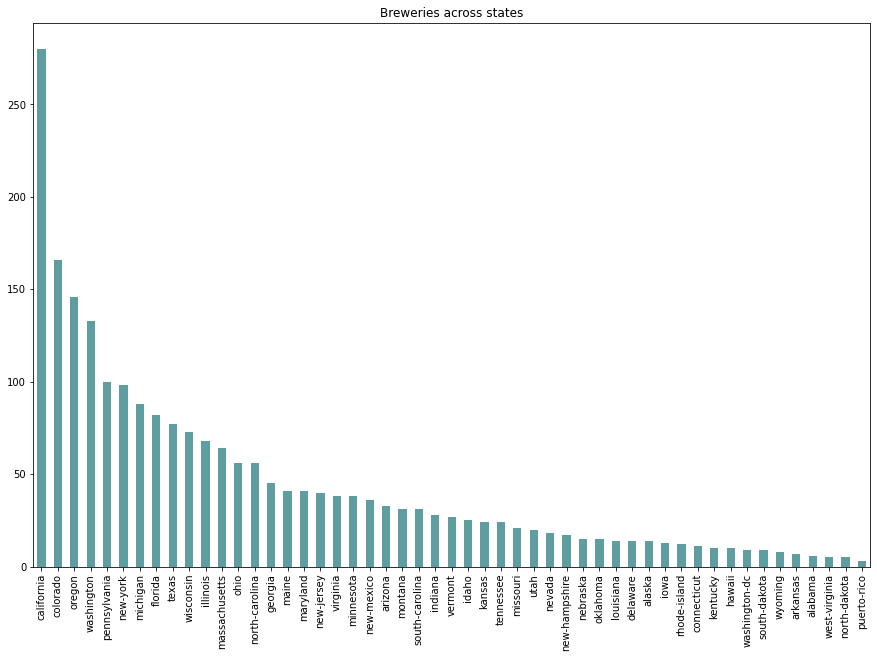

In [17]:
plt.figure(figsize=(15,10))
newdata['state'].value_counts().plot(kind='bar', color='CadetBlue', title='Breweries across states');

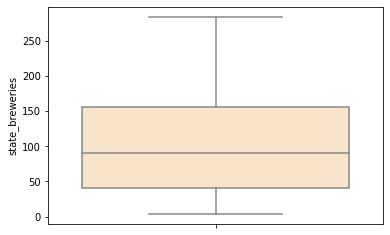

In [18]:
sns.boxplot(y=newdata['state_breweries'], color='bisque');
plt.show()

In [19]:
newdata['state_breweries'].describe()

count    2245.000000
mean      107.340757
std        83.236649
min         3.000000
25%        41.000000
50%        90.000000
75%       156.000000
max       284.000000
Name: state_breweries, dtype: float64

Looking at the boxplot and the summary above, we can state that the average number of breweries across states is, approximately, 107. Most of the states have within their borders between 50 and 150 breweries, with some extreme cases (i.e. states that have over 200 breweries or under 50 breweries).

We can also study the prevalence of the different types of breweries across states. This is done in the following sections:

### Prevalence of BOP's (Brew On Premise) <a name="bop"></a>

In [55]:
data_bop = newdata[newdata.type == 'BOP-BrewOnPremise']
data_bop.shape

(6, 6)

In [21]:
freq_bop = data_bop.groupby(newdata['state']).size()
table_bop = freq_bop.sort_values(ascending = False)
table_bop

state
california      2
virginia        1
pennsylvania    1
oregon          1
illinois        1
dtype: int64

BOP's (Brew On Premise) are not very popular in the US since they can only be found in California, Virgina, Pennsylvania, Oregon and Illinois. Of all these states, California is the only state that has more than one BOP brewery. A graphic representation may not provide a relevant and useful insight in this case.

### Prevalence of Brewpubs <a name="brewpubs"></a>

In [56]:
data_brewpub = newdata[newdata.type == 'Brewpub']
data_brewpub.shape

(1320, 6)

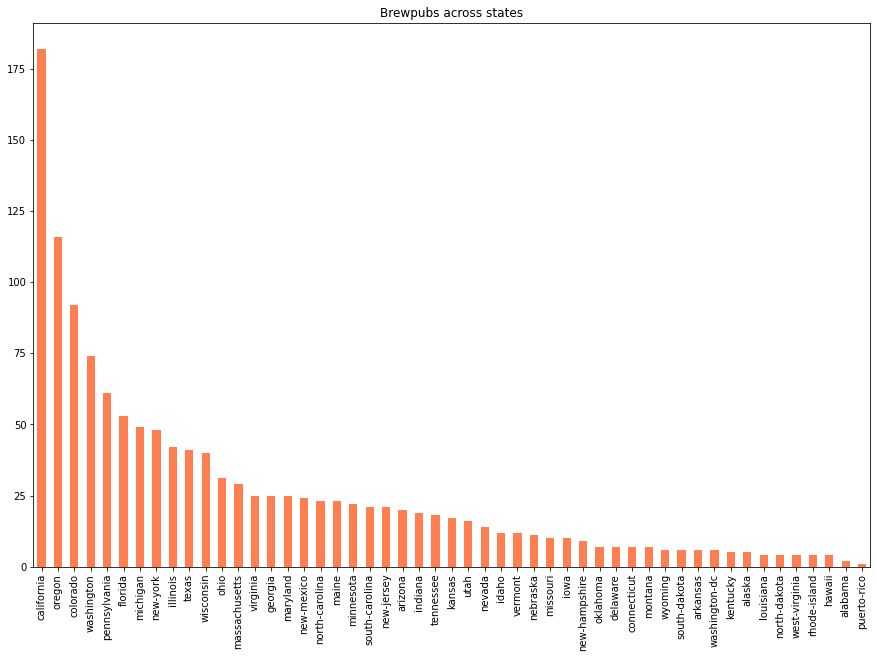

In [25]:
plt.figure(figsize=(15,10))
data_brewpub['state'].value_counts().plot(kind='bar', color='coral', title='Brewpubs across states');

Brewpubs, as we have already seen, are the most popular kind of breweries. Californa, Oregon and Colorado, in this order, are the three states with the largest number of breweries that fall within the category 'brewpub'. Alabama and Puerto Rico are last on this list.

### Prevalence of Contract Breweries <a name="contract"></a>

In [58]:
data_contract = newdata[newdata.type == 'ContractBrewery']
data_contract.shape

(149, 6)

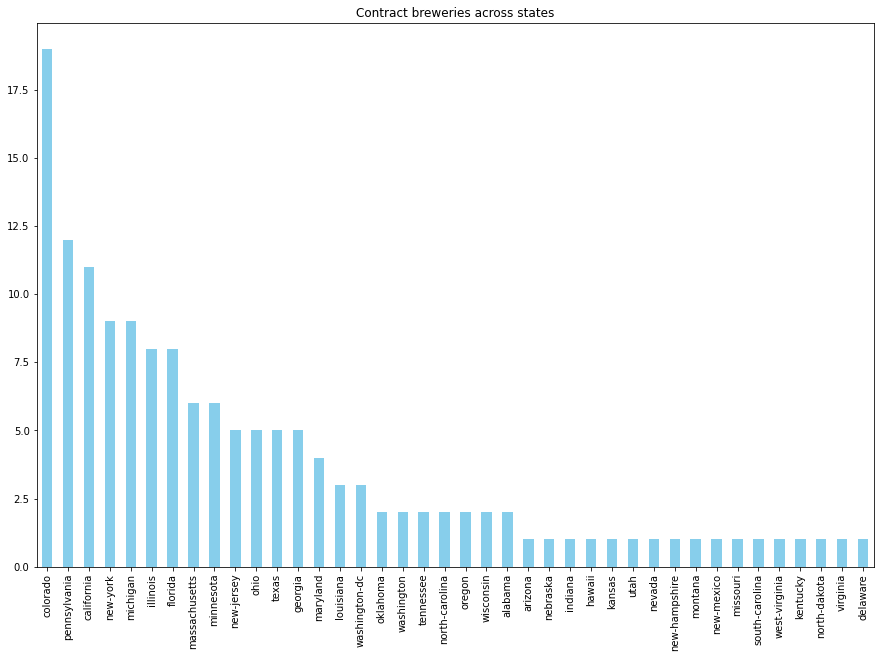

In [28]:
plt.figure(figsize=(15,10))
data_contract['state'].value_counts().plot(kind='bar', color='skyblue', title='Contract breweries across states');

The states where more contract breweries can be found are Colorado, Pennsylvania and California. The overall numbers are not very high but this type of breweries can be found across the whole country.

### Prevalence of Microbreweries <a name="micro"></a>

In [61]:
data_microbrew = newdata[newdata.type == 'Microbrewery']
data_microbrew.shape

(724, 6)

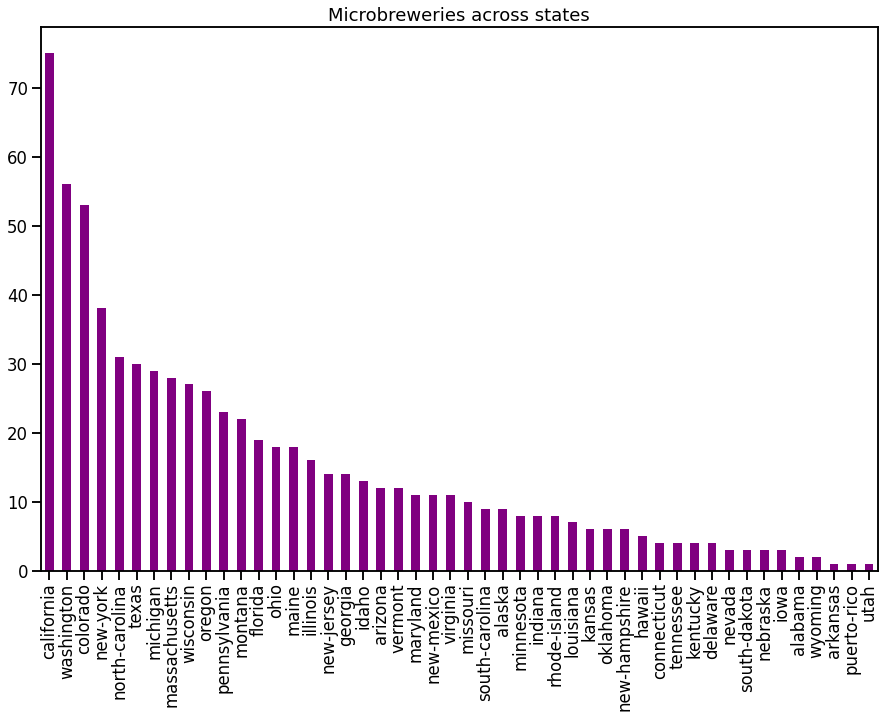

In [63]:
plt.figure(figsize=(15,10))
data_microbrew['state'].value_counts().plot(kind='bar', color='purple', title='Microbreweries across states');

California, Washington, Colorado and New York are the states with a larger number of microbreweries.

### Prevalence of Multitap Bars <a name="multitap"></a>

In [64]:
data_multitap = newdata[newdata.type == 'MultitapBar']
data_multitap.shape

(2, 6)

In [65]:
freq_multitap = data_multitap.groupby(newdata['state']).size()
freq_multitap.sort_values(ascending = False)

state
california    2
dtype: int64

The only state with multitap bars is California, with these amounting up to two. A graphic representation may not provide a relevant and useful insight in this case.

### Prevalence of Regional Breweries <a name="regional"></a>

In [40]:
data_regional = newdata[newdata.type == 'RegionalBrewery']
data_regional.shape

(44, 6)

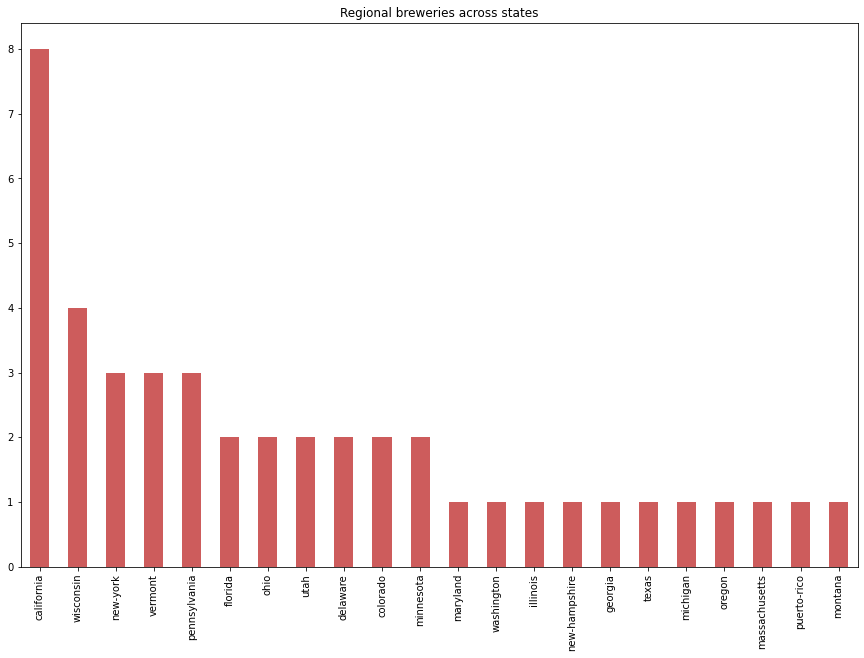

In [42]:
plt.figure(figsize=(15,10))
data_regional['state'].value_counts().plot(kind='bar', color='indianred', title='Regional breweries across states');

California is the state with the highest number of regional breweries, more than doubling the amount of such breweries in the most of the other states that also have regional breweries within their borders. 

## Relationship between State and Brewery Type <a name="correlation"></a>

In this section we examine whether there is any dependence between states and the most prevalent brewery type. First, we create a contingency table as shown below. Second, we apply the Chi-Squared independence test.

In [70]:
contingency_table = pd.crosstab(newdata['state'], newdata['type'], margins = True)
contingency_table = contingency_table.drop(contingency_table.columns[-1],axis=1) 
# We drop the last column, which counts all brewery types of a given state

round(st.stats.chi2_contingency(contingency_table)[1],3) # This will print the p-value

0.002

Since the p-value obtained is smaller than 0.05, we reject the null hypothesis of independence at a 5% significance level. Therefore, we can conclude that states and the different brewery types are not independent. In other words, the different types of breweries are not distributed uniformly across states.

## Brewery Name Analysis <a name="name"></a>

We may expect a large proportion of breweries to contain words such as 'brewery', 'brewing', 'beer', etc in their names. These patterns in the names can be checked in the following manner:

In [37]:
print(newdata.brewery_name.str.count('Brewery').sum())

615


A total of 615 active breweries (about 27.4%) contain 'brewery' in their name.

In [38]:
print(newdata.brewery_name.str.count('Brewing').sum())

1086


When it comes to breweries containing 'brewing' in their name, this is true for 1086 of them (about 48.4%).

In [39]:
print(newdata.brewery_name.str.count('Brew ').sum())

50


'Brew' is not as popular as 'brewing' or 'brewery' as it is contained in only 2.23% of the names.

In [40]:
print(newdata.brewery_name.str.count('Beer').sum())

48


Surprisingly enough, 'beer' is not common to appear in US breweries names. This is true only in 2.14% of the cases.

In [41]:
print(newdata.brewery_name.str.count('Craft').sum())

8


Moreover, the word 'craft' (as in craft beer) is not a common word to appear in a brewery name in the US.